<a href="https://colab.research.google.com/github/raphaelnrod/big-data/blob/main/intro_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
ratings.columns = ['user', 'movieId', 'nota', 'momento']
ratings.head()

,user,movieId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
ratings['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print(f'Media: {ratings.nota.mean()}')
print(f'Mediana: {ratings.nota.median()}')

Media: 3.501556983616962
Mediana: 3.5


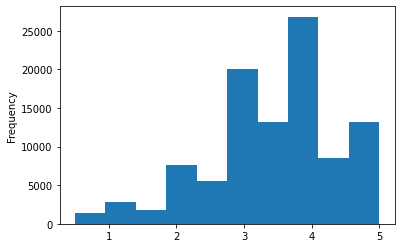

In [ ]:
ratings.nota.plot(kind="hist")

In [ ]:
ratings.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns
print(sns.__version__)

0.11.2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


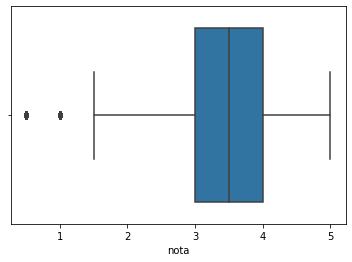

In [ ]:
sns.boxplot(ratings.nota)

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.query("movieId==1").nota.mean()

3.9209302325581397

In [ ]:
medias_por_filme = ratings.groupby('movieId').mean().nota
medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


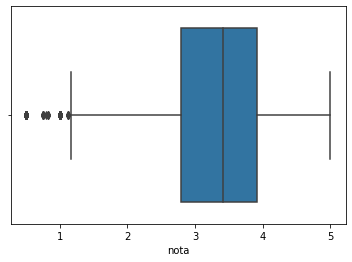

In [ ]:
sns.boxplot(medias_por_filme)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


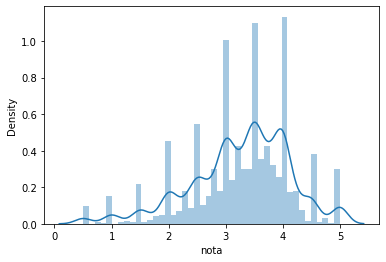

In [ ]:
sns.distplot(medias_por_filme)

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
tmdb.head()

In [ ]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


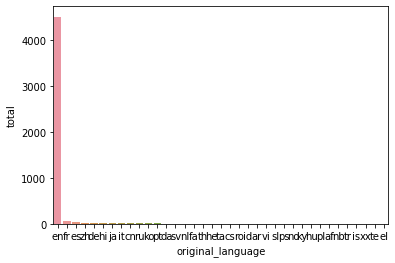

In [ ]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

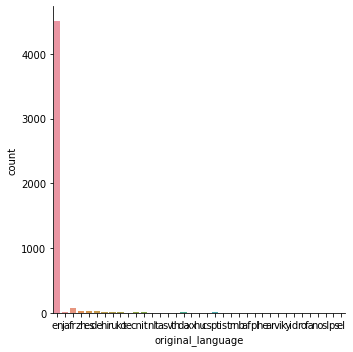

In [ ]:
sns.catplot(x="original_language", kind="count", data = tmdb)

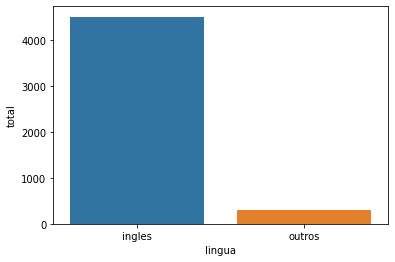

In [ ]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles

dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total",data = dados)

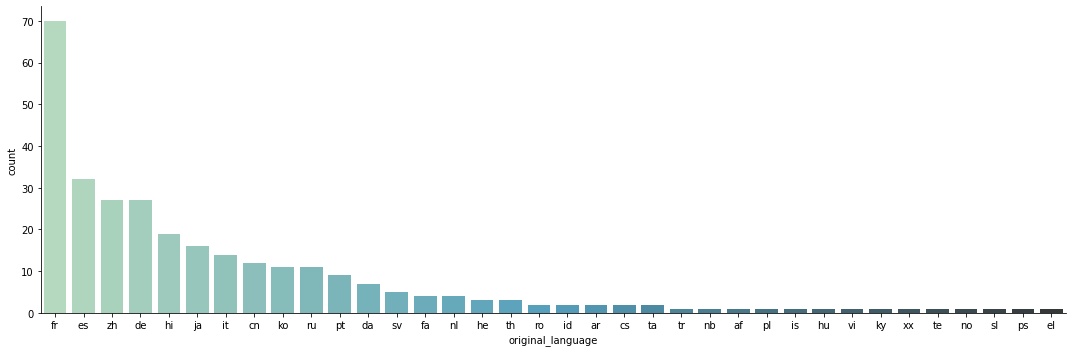

In [ ]:
outras_linguas = tmdb.query("original_language != 'en'")
total_outras_linguas = outras_linguas.original_language.value_counts()
sns.catplot(data=outras_linguas,
    x="original_language", 
    kind="count", 
    aspect=3, 
    order = total_outras_linguas.index,
    palette = "GnBu_d")

In [ ]:
notas_toy_story = ratings.query("movieId == 1")
notas_jumanji = ratings.query("movieId == 2")
print(f"Media ToyStory {round(notas_toy_story.nota.mean(), 2)}")
print(f"Media Jumanji {round(notas_jumanji.nota.mean(), 2)}")

Media ToyStory 3.92
Media Jumanji 3.43


In [ ]:
np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])